In [26]:
import pandas as pd
import seaborn as sns

In [27]:
"""
Hãy phân tích tác động của điểm toán với điểm DH1, DH2, DH3 dựa trên GT, KV, KT, DT, biết rằng mặc định DT là Kinh
"""

"""
b1: xử lý cơ bản
    1. xác định số lượng biến số tham gia
    2. thu thập dữ liệu
    3. Tổng quan dữ liệu
    4. xứ lý cơ bản
    - loại bỏ dòng trống
    - loại bỏ dòng trùng
    - khảo sát dữ liệu thiếu và điền thiếu
    5. Kiểm tra dữ liệu
"""

'\nb1: xử lý cơ bản\n    1. xác định số lượng biến số tham gia\n    2. thu thập dữ liệu\n    3. Tổng quan dữ liệu\n    4. xứ lý cơ bản\n    - loại bỏ dòng trống\n    - loại bỏ dòng trùng\n    - khảo sát dữ liệu thiếu và điền thiếu\n    5. Kiểm tra dữ liệu\n'

In [28]:
df = pd.read_csv('dulieuxettuyendaihoc.csv', header = 0, delimiter=',', encoding='unicode_escape')

df.dropna(how='all', inplace=True)
df.drop_duplicates(inplace=True)
df['DT'].fillna('Kinh', inplace=True)
df = df[['T1', 'T2', 'T3', 'T4', 'T5', 'T6','DH1', 'DH2', 'DH3', 'GT', 'KV', 'KT', 'DT']]
df

,T1,T2,T3,T4,T5,T6,DH1,DH2,DH3,GT,KV,KT,DT
0,7.2,8.4,7.4,7.2,7.4,6.9,3.25,3.25,4.50,F,2NT,A1,Kinh
1,5.4,6.3,4.3,4.9,3.0,4.0,6.00,4.00,3.50,M,1,C,Kinh
2,5.6,5.0,2.8,6.1,4.8,5.7,5.00,6.75,4.00,M,1,C,Kinh
3,6.6,5.1,5.9,4.1,6.1,7.4,4.25,4.25,5.25,M,1,D1,Kinh
4,6.0,5.4,7.6,4.4,6.8,8.0,4.25,4.50,5.00,M,2NT,A,Kinh
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8.6,8.9,7.7,6.7,7.9,6.6,5.25,1.50,6.25,F,1,C,Kinh
96,3.7,4.1,3.1,3.4,5.5,5.7,5.25,3.75,4.75,F,1,C,Kinh
97,8.8,9.5,9.5,8.5,9.0,8.5,7.00,8.00,4.00,M,2NT,C,Kinh
98,2.7,2.8,6.2,5.2,4.1,4.3,5.00,3.50,5.50,M,1,C,Kinh


<AxesSubplot:xlabel='DT', ylabel='count'>

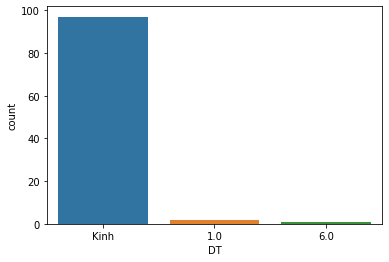

In [29]:
"""Hãy trực quan số lượng sinh viên theo giới tính"""

from numpy import count_nonzero
sns.countplot(x='DT', data=df)

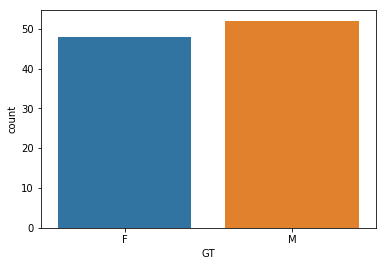

In [15]:

sns.countplot(x='GT', data=df)

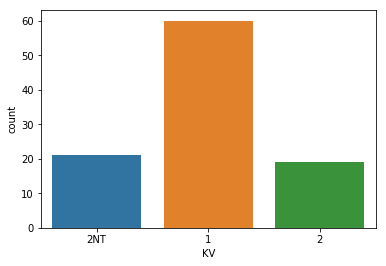

In [16]:

sns.countplot(x='KV', data=df)

In [ ]:
"""
Hãy so sánh số lượng học sinh dự thi theo nhóm giới tính
"""

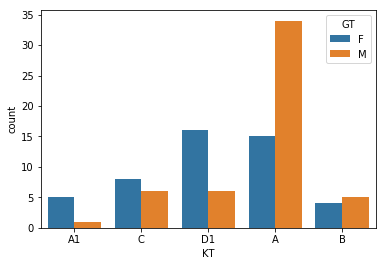

In [17]:
sns.countplot(x='KT', hue='GT', data=df)

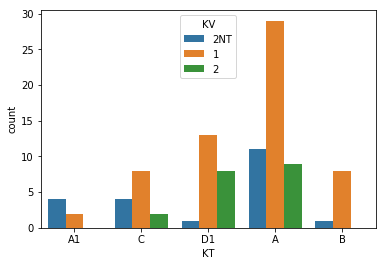

In [18]:
sns.countplot(x='KT', hue='KV', data=df)

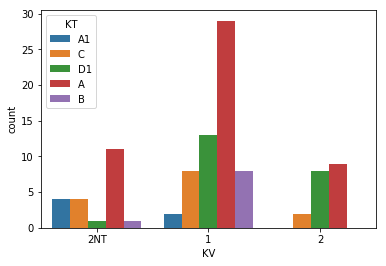

In [19]:
sns.countplot(x='KV', hue='KT', data=df)

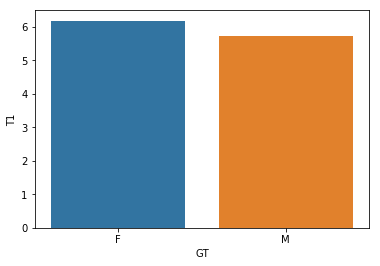

In [20]:
"""
Hãy so sánh điểm toán học kì 1 năm lớp 10 của nhóm giới tính
"""
sns.barplot(x="GT", y='T1', data=df, ci=None)

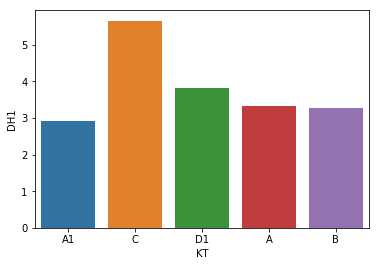

In [22]:
"""
Hãy so sánh điểm trung binfh DH1 trene nnhóm khối thi
"""
sns.barplot(x="KT", y='DH1', data=df, ci=None)

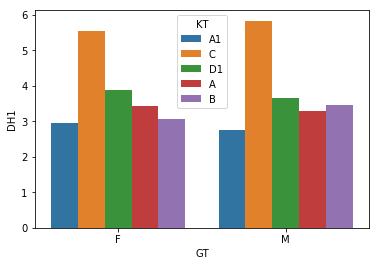

In [27]:
'''So sánh điểm trung bình DH1 theo nhóm giới tính dựa trên khối thi'''
sns.barplot(x='GT', y='DH1', hue='KT', data=df, ci=None)
# plt.show()

In [47]:
# Ngày 04/06/2022
# Kỹ thuật feature engineering
# -> đây là kỹ thuật tạo thêm hoặc biến đổi số liệu sẵn có thành các biến số mới phù hợp nghiệp vụ phân tích

# Ví dụ lệ phí đăng ký thi
# A1: 60000
# C: 40000
# D1: 35000
# A: 55000
# B: 80000
# Hãy tạo ra cột LEPHI thoả mãn yêu cầu trên

dict_map = {
    'A1': 60000, 'C': 40000, 'D1': 35000, 'A': 55000, 'B': 80000
}
df['LEPHI'] = df['KT'].map(dict_map)
df.head()

,T1,T2,T3,T4,T5,T6,DH1,DH2,DH3,GT,KV,KT,DT,LEPHI
0,7.2,8.4,7.4,7.2,7.4,6.9,3.25,3.25,4.50,F,2NT,A1,Kinh,60000
1,5.4,6.3,4.3,4.9,3.0,4.0,6.00,4.00,3.50,M,1,C,Kinh,40000
2,5.6,5.0,2.8,6.1,4.8,5.7,5.00,6.75,4.00,M,1,C,Kinh,40000
3,6.6,5.1,5.9,4.1,6.1,7.4,4.25,4.25,5.25,M,1,D1,Kinh,35000
4,6.0,5.4,7.6,4.4,6.8,8.0,4.25,4.50,5.00,M,2NT,A,Kinh,55000


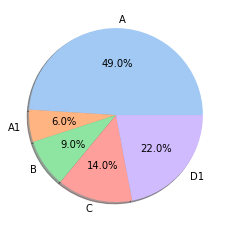

In [32]:
# Biểu đồ Pie
import matplotlib.pyplot as plt
# Mục đích: Trực quan hoá dữ liệu theo nhóm tỉ lệ phần trăm

gb = df.groupby(['KT'])['KT'].agg(['count'])
labels = gb.index
data = list(gb['count'])

colors = sns.color_palette('pastel') #tạo bảng màu
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()

#Pie theo khu vực


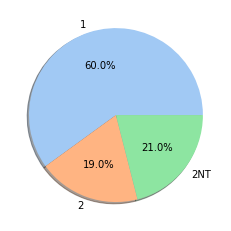

In [53]:
gb = df.groupby(['KV'])['KV'].agg(['count'])
labels = gb.index
data = list(gb['count'])

colors = sns.color_palette('pastel') #tạo bảng màu
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()

In [69]:
#biến định tính thì chỉ có hàm count để sử dụng tổng hợp
#biến định lượng thì có nhiều hàm để sử dụng như sum, min, max, avg,...

# Trực quan tỉ lệ phần trăm chi phí dự thi trên từng khối thi
gb = df.groupby(['KT'])['LEPHI'].agg(['sum'])
labels = gb.index
# print(labels)
data = list(gb['sum'])

colors = sns.color_palette('pastel') #tạo bảng màu
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()


Index(['A', 'A1', 'B', 'C', 'D1'], dtype='object', name='KT')


In [ ]:
# Khi trực quan dữ liệu ta cần lưu ý đến loại biến đang tham gia vào trực quan. Thông thường việc lựa chọn biểu đồ sẽ căn cứ dựa trên ý nghĩa nghiệp vụ và sự phối hợp giữa csac loiaj biến như:
# - ĐỊnh tính kết hợp định đính tính
# - Định tính kết hợp định lượng
# - Định lượng kết hợp định lượng

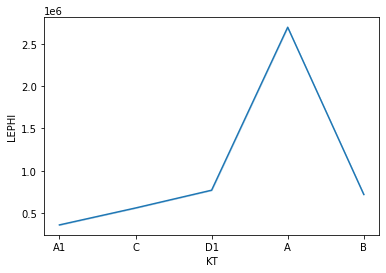

In [62]:
# Biểu đồ line 
# Mục đích: Thường dùng cho trực quan dữ liệu theo thời gian

# Trực quan dữ liệu chi phí dự thi dựa theo khối thi bằng biểu đồ line

sns.lineplot(x='KT', y='LEPHI', data=df, estimator=sum)
plt.show()


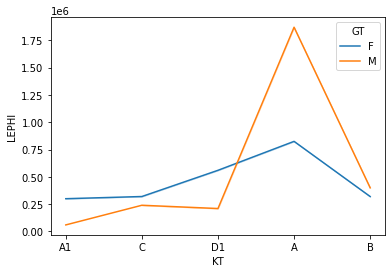

In [64]:
# Trực quan chi phí dự thi theo khối thi theo từng nhóm giới tính bằng biểu đồ line
sns.lineplot(x='KT', y='LEPHI', hue='GT', data=df, estimator=sum)
plt.show()


In [66]:

# Phân tích định lượng
# Phân tích định lượng lấy trọng tâm là các biến định lượng

# bước 1. Mô tả dữ liệu biến định lượng T1

df['T1'].describe()

count    100.000000
mean       5.946000
std        1.608338
min        2.400000
25%        5.000000
50%        5.850000
75%        7.200000
max        9.300000
Name: T1, dtype: float64

In [ ]:
# std càng cao thì dữ liệu biến động càng cao
# std thấp thì mean mới có nghĩa thống kê
# thống kê trên 100 sinh viên
# điểm trung bình là 5.9
# độ biến động dữ liệu là 1.6
# điểm thấp nhất là 2.4
# có 25% sinh viên có điểm nhỏ hơn 5
# 50% sinh viên có điểm nhỏ hơn 5.8
# ...

In [71]:
df[['T1','T2','T3','T4','T5','T6','DH1','DH2','DH3']].describe()

,T1,T2,T3,T4,T5,T6,DH1,DH2,DH3
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000,100.000000
mean,5.946000,6.374000,6.383000,6.291000,6.717000,6.9370,3.740000,4.255000,4.875000
std,1.608338,1.561443,1.574484,1.469563,1.478059,1.3632,1.424408,1.060053,1.041136
min,2.400000,2.800000,2.300000,2.900000,3.000000,3.7000,1.000000,1.500000,2.750000
25%,5.000000,5.300000,5.175000,5.300000,5.800000,6.0000,2.500000,3.500000,4.250000
50%,5.850000,6.250000,6.650000,6.350000,6.800000,7.1000,3.625000,4.125000,4.750000
75%,7.200000,7.525000,7.500000,7.600000,7.800000,8.0000,4.750000,4.750000,5.500000
max,9.300000,9.600000,9.500000,9.400000,9.500000,9.5000,7.000000,8.000000,8.000000


In [72]:
df.groupby('GT')['T1'].describe()

,count,mean,std,min,25%,50%,75%,max
GT,,,,,,,,
F,48.0,6.187500,1.612006,2.4,5.175,6.2,7.300,8.8
M,52.0,5.723077,1.587774,2.5,4.850,5.6,6.525,9.3


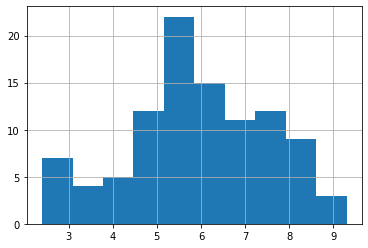

In [73]:
# Histogram cho biết xác xuất xảy ra của biến cố

df['T1'].hist()
plt.show()

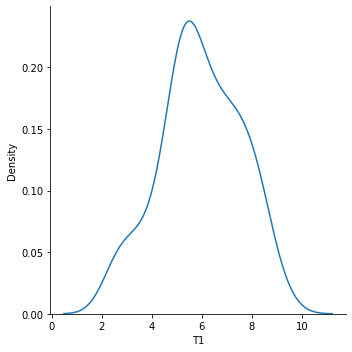

In [74]:
sns.displot(df, x='T1', kind='kde')
plt.show()